[Scanpy Tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html)
[Anndata documentation](https://anndata.readthedocs.io/en/stable/anndata.AnnData.html#anndata.AnnData)

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

scanpy==1.4.2 anndata==0.6.22.post1 numpy==1.17.2 scipy==1.3.1 pandas==0.25.1 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 


In [3]:
sc.settings.set_figure_params(dpi=80)

In [28]:
def read_raw_counts(tsv):
    '''
    read .tsv raw counts with columns = cells; row = genes
    works specially for nature 2019 data
    
    input: .tsv file
    return anndata fitting scanpy
    '''
    # read raw counts data
    adata = sc.read(tsv, cache = True)
    
    # remove first row "Library"
    # transpose to make var = genes; obs = cells;
    adata = adata[1:, :].copy().T 
    
    return(adata)

In [55]:
# import annotation
from scSecretome.annot import *

In [110]:
def benchmarking(adata, species = 'human'):
    # number of UMI counts per cell
    adata.obs['n_counts'] = adata.X.sum(axis=1)
    
    # number of genes per cell (non-zero)
    adata.obs['n_genes'] = np.count_nonzero(adata.X, axis = 1)
    
    # find mitochondiral genes and count
    mito_genes = adata.var_names.str.startswith('MT-')
    adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
    
    # % housekeepers present
    housekeeper = housekeeping()
    # not all housekeepers are present
    hk = list(set(housekeeper).intersection(set(adata.var.index)))
    adata.obs['percent_housekeeper'] = np.count_nonzero(adata[:, hk].X, axis=1) / len(housekeeper)
    
    # % lineage specific genes showing up
    for g in read_haemapedia(species = species).groupby('Lineage'):
        ln = list(set(g[1]['Gene Symbol'].values).intersection(set(adata.var.index)))
        adata.obs[g[0]] = np.count_nonzero(adata[:, ln].X, axis=1)/g[1].shape[0]
    

In [ ]:
def capture_secretome(adata):

In [109]:
np.sum(adata[:, hk].X, axis=1)

ArrayView([4324., 2171., 1562., ..., 1063.,  868.,  411.], dtype=float32)

In [30]:
d = read_raw_counts('/home/hsher/nature2019_sc/raw_counts/GSM3305365_GMP.raw_counts.tsv')

... reading from cache file cache/home-hsher-nature2019_sc-raw_counts-GSM3305365_GMP.raw_counts.h5ad


In [111]:
benchmarking(d)

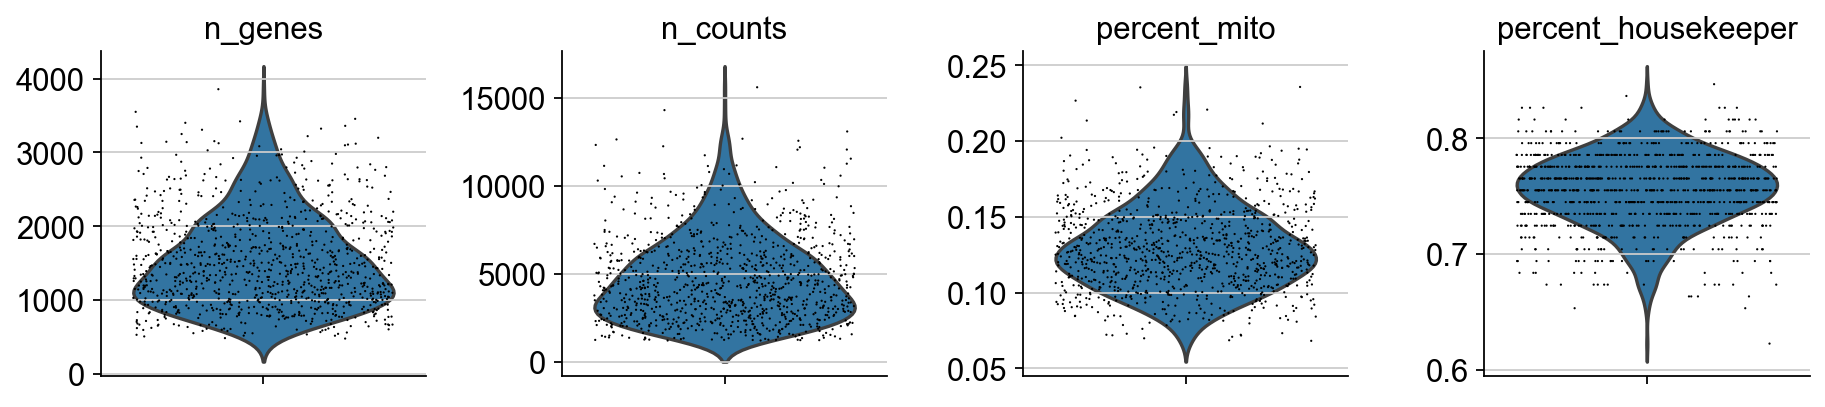

In [112]:
sc.pl.violin(d, ['n_genes', 'n_counts', 'percent_mito', 'percent_housekeeper'],
             jitter=0.4, multi_panel=True)

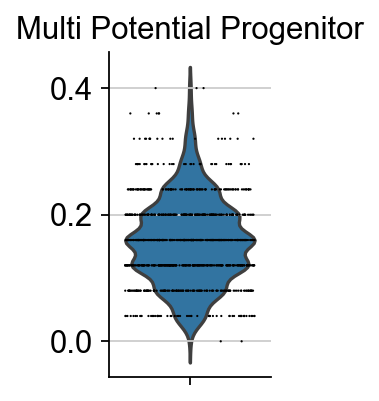

In [113]:
sc.pl.violin(d, ['Multi Potential Progenitor'],
             jitter=0.4, multi_panel=True)

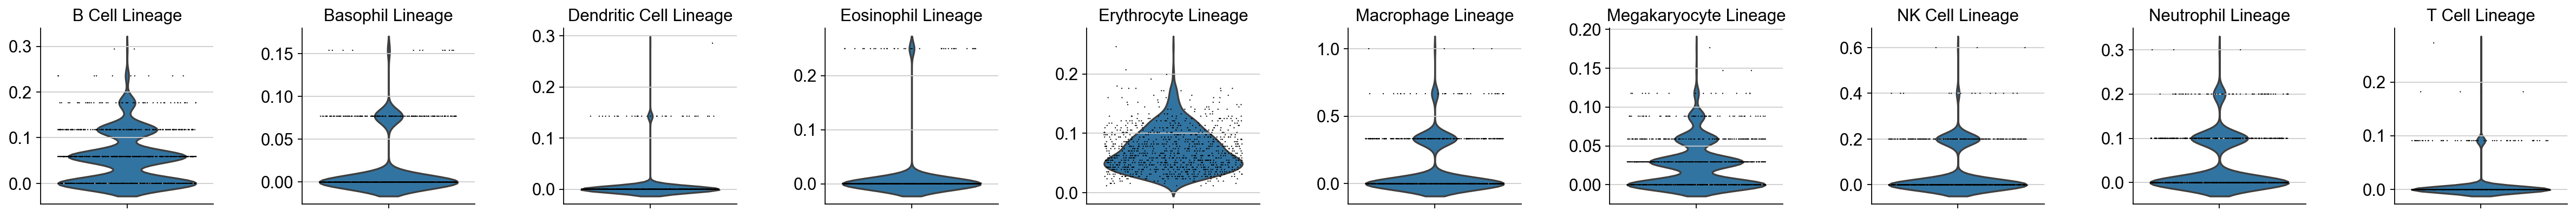

In [122]:
all_lineage = d.obs.columns[d.obs.columns.str.contains('Lineage')]
sc.pl.violin(d, all_lineage,
             jitter=0.4, multi_panel=True)

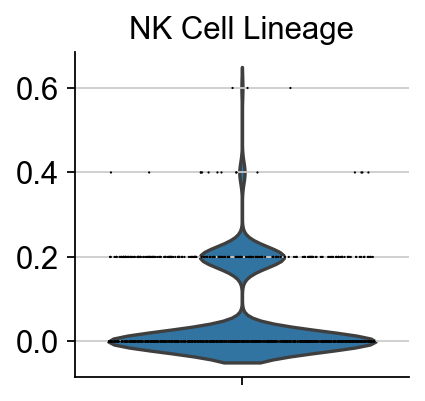

In [116]:
sc.pl.violin(d, ['NK Cell Lineage'],
             jitter=0.4, multi_panel=True)